In [9]:
from shapely import LineString, Point, MultiLineString, GeometryCollection

import math
import numpy as np

## Draw arrows

How to draw arrows?

* A head coordinate and a vector and a length?
* A head coordinate and a tail coordinate?

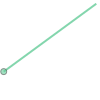

In [10]:
head = (10, 3)
tail_vec = np.array([30, 22])
tail_vec = tail_vec / np.linalg.norm(tail_vec)
mag = 40

tail_coord = np.array(head) + tail_vec * mag
tail_coord

arrow_shaft = LineString([head, tail_coord])

GeometryCollection([arrow_shaft, Point(head)])

## Add an arrow head

What angle does the arrow sharps follow? 30 degrees?

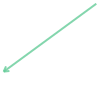

In [11]:
alpha = 30
a_rad = math.radians(alpha)

sharps_mag = max(2, mag * 0.05)
rot_mat_left = np.array([[math.cos(a_rad), math.sin(a_rad)], [-math.sin(a_rad), math.cos(a_rad)]])
rot_mat_right = np.array([[math.cos(-a_rad), math.sin(-a_rad)], [-math.sin(-a_rad), math.cos(-a_rad)]])
a_sharp_vec = tail_vec @ rot_mat_left
b_sharp_vec = tail_vec @ rot_mat_right

a_sharp_coord = np.array(head) + a_sharp_vec * sharps_mag
b_sharp_coord = np.array(head) + b_sharp_vec * sharps_mag

a_sharp = LineString([head, a_sharp_coord])
b_sharp = LineString([head, b_sharp_coord])

arrow = GeometryCollection([arrow_shaft, a_sharp, b_sharp])
arrow

## Try a simpler way of creating arrow sharps

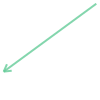

In [13]:
import shapely.affinity as aff
alpha = 30
scale = 0.07
a_sharp = aff.rotate(arrow_shaft, alpha, origin=Point(head))
a_sharp = aff.scale(a_sharp, xfact=scale, yfact=scale, origin=Point(head))
b_sharp = aff.rotate(arrow_shaft, -alpha, origin=Point(head))
b_sharp = aff.scale(b_sharp, xfact=scale, yfact=scale, origin=Point(head))
GeometryCollection([a_sharp, b_sharp, arrow_shaft])

## Write an arrow function

In [15]:
from numpy.typing import ArrayLike

def draw_arrow(
    anchor_point: tuple[float, float],
    tail_vector: ArrayLike,
    length: float,
    sharp_angle: float = 30,
    sharp_scale: float = 0.07
) -> MultiLineString:
    """
    Draws an arrow
    """
    head = anchor_point
    tail_vec = tail_vector / np.linalg.norm(tail_vector)
    tail_coord = np.array(head) + tail_vec * length
    arrow_shaft = LineString([head, tail_coord])

    a_sharp = aff.rotate(arrow_shaft, sharp_angle, origin=Point(head))
    a_sharp = aff.scale(a_sharp, xfact=sharp_scale, yfact=scale, origin=Point(head))
    b_sharp = aff.rotate(arrow_shaft, -sharp_angle, origin=Point(head))
    b_sharp = aff.scale(b_sharp, xfact=sharp_scale, yfact=scale, origin=Point(head))

    arrow = MultiLineString([arrow_shaft, a_sharp, b_sharp])
    return arrow

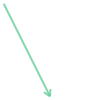

In [18]:
draw_arrow((10, 3), [-0.5, 1], 10)

## Draw Linear Loads